|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

# Q3: Split tha dataset into training and testing

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('real_fake',axis=1)
y = df['real_fake']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [12]:
y_test

19339    fake
56232    real
63763    real
11034    fake
25434    fake
         ... 
826      fake
62121    real
39568    real
49777    real
44974    real
Name: real_fake, Length: 19274, dtype: object

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        fake       0.85      0.86      0.85      9541
        real       0.86      0.85      0.85      9733

    accuracy                           0.85     19274
   macro avg       0.85      0.85      0.85     19274
weighted avg       0.85      0.85      0.85     19274



In [35]:
print('the model accuracy = ',accuracy_score(y_test,predictions))

the model accuracy =  0.8528068901110304


In [24]:
print(confusion_matrix(y_test,predictions))

[[8163 1378]
 [1459 8274]]


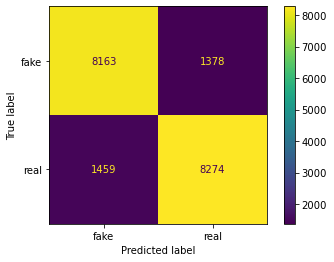

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[8027 1514]
 [ 436 9297]]


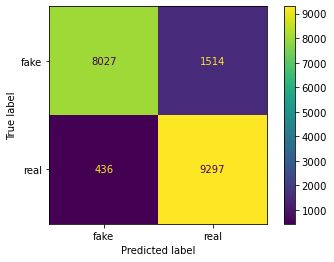

In [31]:
plot_confusion_matrix(rfc, X_test, y_test)  
plt.show()

In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

        fake       0.95      0.84      0.89      9541
        real       0.86      0.96      0.91      9733

    accuracy                           0.90     19274
   macro avg       0.90      0.90      0.90     19274
weighted avg       0.90      0.90      0.90     19274



In [33]:
print(accuracy_score(y_test,predictions))

0.8528068901110304
